# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

In [1]:
import numpy as np
import pandas as pd

**Import the visualization libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [8]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**How many unique title codes are there?**

In [9]:
df['title'].nunique()

110

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Create a new column called "Reason" that contains this string value.** 

In [10]:
df['Reason'] = df['title'].apply(lambda reason: reason.split(':')[0])

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**What is the most common Reason for a 911 call based off of this new column?**

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

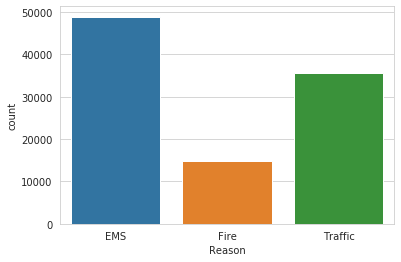

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Reason', data=df)

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [14]:
type(df['timeStamp'].loc[0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime] Convert the column from strings to DateTime objects.**

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [17]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [19]:
time.hour

17

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month']= df['timeStamp'].apply(lambda x: x.month)
df['Week'] = df['timeStamp'].apply(lambda x: x.week)

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [24]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

Text(0.5, 0, 'Day of week')

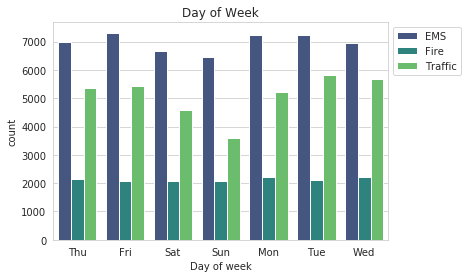

In [26]:
sns.countplot(x=df['Day of Week'],hue=df['Reason'],palette='viridis')
plt.title('Day of Week')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('Day of week')

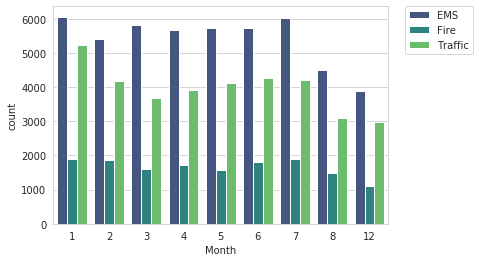

In [27]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

___
**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [31]:
bymonth = df.groupby('Month').count()

In [32]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Week,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


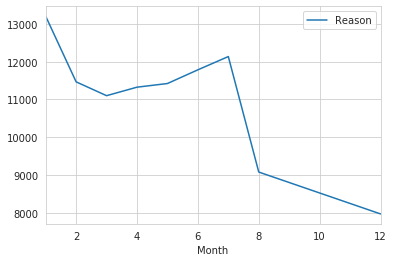

In [33]:
bymonth.plot.line(y='Reason')

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month.**

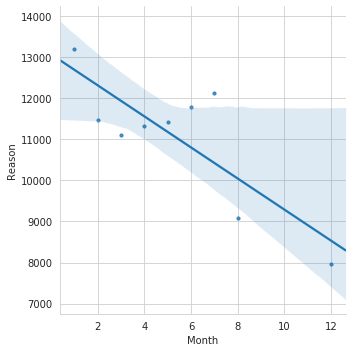

In [36]:
sns.lmplot(x='Month',y='Reason',data=bymonth.reset_index(), scatter_kws={'s':10})

**Create a new column called 'Date' that contains the date from the timeStamp column.** 

In [37]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,50,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,50,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,50,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [39]:
bydate = df.groupby('Date').count()
bydate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Day of Week
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389


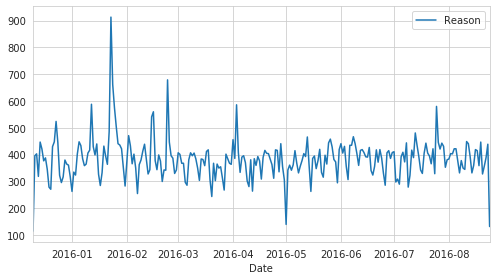

In [41]:
bydate.plot.line(y='Reason',figsize=(7,4))
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

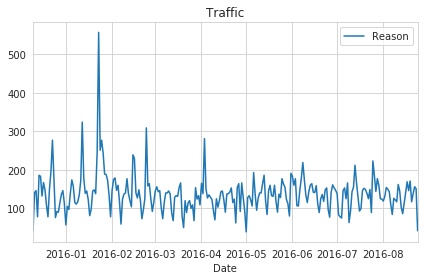

In [42]:
df[df['Reason'] == 'Traffic'].groupby('Date').count().plot.line(y='Reason')
plt.title('Traffic')
plt.tight_layout()

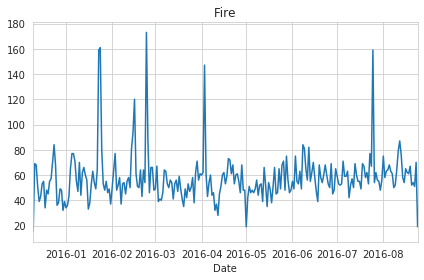

In [43]:
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()
plt.title('Fire')
plt.tight_layout()

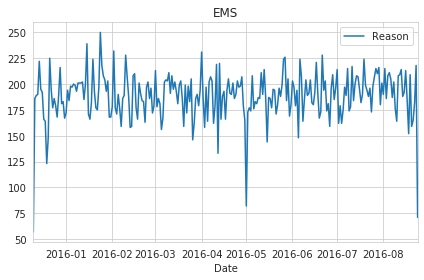

In [45]:
df[df['Reason'] == 'EMS'].groupby('Date').count().plot.line(y='Reason')
plt.title('EMS')
plt.tight_layout()

In [49]:
by_date_reason = df.groupby(['Date', 'Reason']).count()
by_date_reason.head()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Date       Reason                                                           
2015-12-10 EMS       57   57    57   52     57         57   57    57   57   
           Fire      15   15    15   13     15         15   15    15   15   
           Traffic   43   43    43   35     43         43   43    41   43   
2015-12-11 EMS      186  186   186  166    186        186  186   186  186   
           Fire      69   69    69   59     69         69   68    68   69   

                    Hour  Month  Week  Day of Week  
Date       Reason                                   
2015-12-10 EMS        57     57    57           57  
           Fire       15     15    15           15  
           Traffic    43     43    43           43  
2015-12-11 EMS       186    186   186          186  
           Fire       69     69    69           69

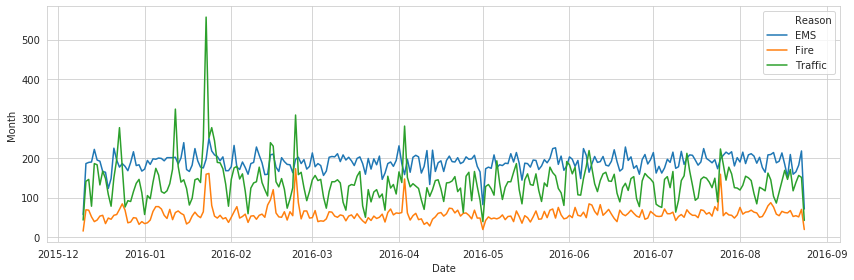

In [52]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Date',y='Month',hue='Reason', data=by_date_reason.reset_index())
plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week!**

In [64]:
by_day_hour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack(level=-1)
by_day_hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Now create a HeatMap using this new DataFrame.**

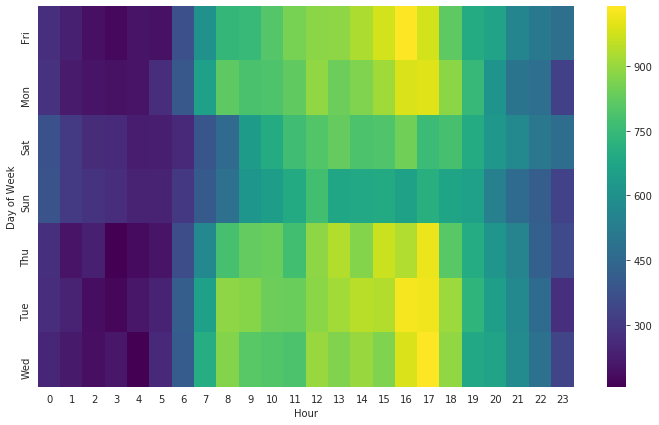

In [65]:
plt.figure(figsize=(12,7))
sns.heatmap(data=by_day_hour, cmap='viridis')

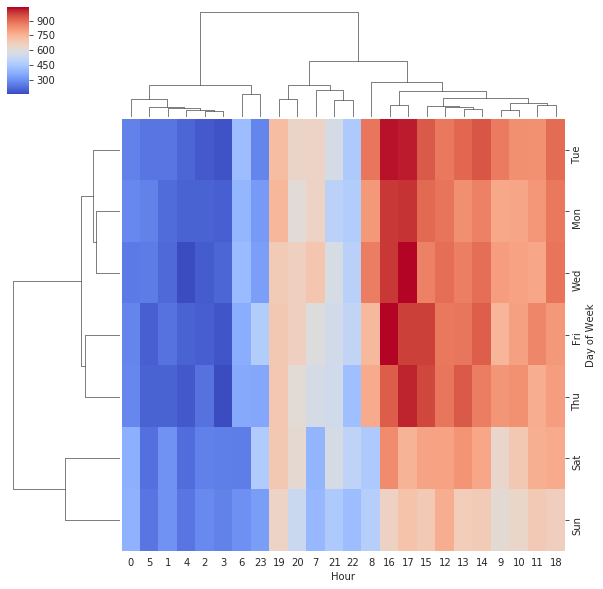

In [66]:
sns.clustermap(by_day_hour, cmap='coolwarm')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [70]:
by_day_month = df.groupby(['Day of Week','Month']).count()['Reason'].unstack(level=-1)
by_day_month.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


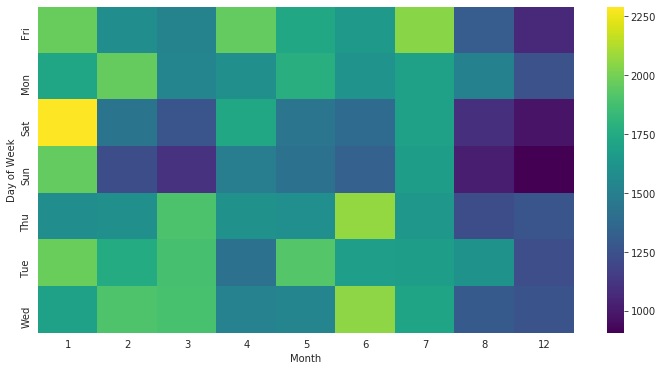

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(by_day_month,cmap='viridis')

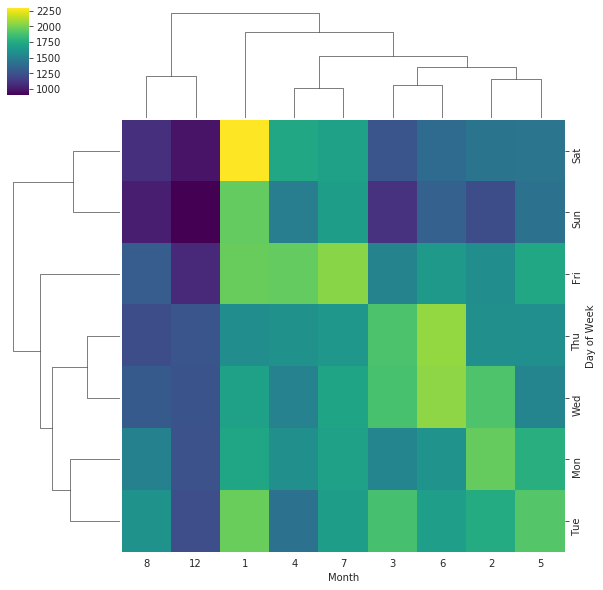

In [72]:
sns.clustermap(data=by_day_month, cmap='viridis')